In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df = pd.read_csv('C:\\Users\\Nitin\\Desktop\\Third Year\\SEM 6\\Data\\diabetic_data.csv')

print('No. of Samples:', len(df))
df.head()

No. of Samples: 101766


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [106]:
df = df[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
print("Original dataset size:", {len(df)})

Original dataset size: {99343}


In [107]:
df['output_label'] = (df['readmitted'] == '<30').astype('int')

In [108]:
#calculate prevalence means the number of patients rehospitalized within 30 days
def cal_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

print('prevalence: %.3f'%cal_prevalence(df['output_label'].values))

prevalence: 0.114


In [109]:
df = df.replace('?', np.nan)
#check any missing value in numerical data
cols_num = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [110]:
#categorical data
cols_cat = ['race', 'gender',
'max_glu_serum', 'A1Cresult',
'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
'tolazamide', 'insulin',
'glyburide-metformin', 'glipizide-metformin',
'glimepiride-pioglitazone', 'metformin-rosiglitazone',
'metformin-pioglitazone', 'change', 'diabetesMed', 'payer_code']

df [' race' ] = df ['race' ] . fillna ('UNK')
df ['payer_code' ] = df ['payer_code' ] . fillna (' UNK')
df ['medical_specialty'] = df['medical_specialty' ] . fillna ('UNK')

print ('Number medical specialty:', df.medical_specialty.nunique () )
df. groupby ('medical_specialty' ) . size() . sort_values (ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [111]:
top_ten = ['UNK', 'InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 
           'Nephrology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Radiologist']

df['med_spec'] = df['medical_specialty'].copy()

df.loc[~df.med_spec.isin(top_ten), 'med_spec'] = 'Other'

df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [112]:
#for get_dummies function convert numerical data in string

cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

In [113]:
#to create one-hot encoding columns, use the get_dummies function
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']], drop_first = True)

In [114]:
df_cat = df_cat.astype('int64')
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
df = pd.concat([df, df_cat], axis=1)

In [116]:
#column names of the categorical data to keep track of them
cols_all_cat = list(df_cat.columns)

In [117]:
df[['age','weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [118]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [119]:
#map to 0 to 90 by 10s for the numerical data.
age_id = {
    '[0-10)':0,
    '[10-20)':10,
    '[20-30)':20,
    '[30-40)':30,
    '[40-50)':40,
    '[50-60)':50,
    '[60-70)':60,
    '[70-80)':70,
    '[80-90)':80,
    '[90-100)':90
}
pd.set_option('future.no_silent_downcasting', True)
df['age_group'] = df.age.replace(age_id)

In [120]:
df.weight.notnull().sum()

3125

In [121]:
#a variable to say if weight was filled out or not.
df['has_weight'] = df.weight.notnull().astype('int')

In [122]:
#to keep track of these extra columns
cols_extra = ['age_group', 'has_weight']

In [123]:
cols2use = cols_num + cols_all_cat + cols_extra
#new dataframe with only the columns we want to use
df_data = df[cols2use + ['output_label']]

In [124]:
#shuffle data in case if there is some order in the data
#random_state is just specified so the project is reproducable
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [125]:
#30% data as test and validation data
df_valid_test = df_data.sample(frac = 0.30, random_state = 42)
print("Split Size : %.3f"%(len(df_valid_test)/len(df_data)))

Split Size : 0.300


In [126]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [127]:
df_train_all = df_data.drop(df_valid_test.index)

In [128]:
print("Test prevalence (n = %d) : %.3f"% (len(df_test), cal_prevalence(df_test.output_label.values)))
print("Valid prevalance (n = %d) : %.3f"% (len(df_valid), cal_prevalence(df_valid.output_label.values)))
print("Train all prevalance (n = %d) : %.3f"% (len(df_train_all), cal_prevalence(df_train_all.output_label.values)))

Test prevalence (n = 14902) : 0.117
Valid prevalance (n = 14901) : 0.113
Train all prevalance (n = 69540) : 0.113


In [129]:
row_pos = df_train_all.output_label == 1
df_train_pos = df_train_all.loc[row_pos]
df_train_neg = df_train_all.loc[~row_pos]

df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)], axis = 0)

df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print("Train prevalence (n = %d) : %.3f"% (len(df_train), cal_prevalence(df_train.output_label.values)))

Train prevalence (n = 15766) : 0.500


In [130]:
#input matrix X and output vector y
X_train = df_train[cols2use].values
X_train_all = df_train_all[cols2use].values
X_valid = df_valid[cols2use].values

Y_train = df_train['output_label'].values
Y_valid = df_valid['output_label'].values

print('Training All shapes:', X_train_all.shape)
print('Training shapes:', X_train.shape, Y_train.shape)
print('Validation shapes:', X_valid.shape, Y_valid.shape)

Training All shapes: (69540, 140)
Training shapes: (15766, 140) (15766,)
Validation shapes: (14901, 140) (14901,)


In [131]:
#scale the data using scikit-learn’s Standard Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [132]:
#scaler for the test data
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [133]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [134]:
#transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Model Selection

In [135]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def cal_specificity (y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = cal_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('Accuracy:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precision:%.3f'%precision)
    print('Specificity:%.3f'%specificity)
    print('Prevalence:%.3f'%cal_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [136]:
thresh = 0.5

In [137]:
#k-nearest neighbors 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, Y_train)

KNeighborsClassifier(n_neighbors=100)

In [138]:
#Performance
Y_train_preds = knn.predict_proba(X_train_tf) [:, 1]
Y_valid_preds = knn.predict_proba(X_valid_tf) [:, 1]
print('KNN')
print('Training')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity = print_report(Y_train, Y_train_preds, thresh)
print('Validation')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity = print_report(Y_valid, Y_valid_preds, thresh)

KNN
Training
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [139]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_tf, Y_train)

LogisticRegression(random_state=42)

In [140]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [141]:
#Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log_loss', alpha = 0.1, random_state = 42)
sgdc.fit(X_train_tf, Y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [142]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [143]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, Y_train)

GaussianNB()

In [144]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [145]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [146]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [147]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
rf.fit(X_train_tf, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [148]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Random Forest
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


In [149]:
#Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)
gbc.fit(X_train_tf, Y_train)

GradientBoostingClassifier(random_state=42)

In [150]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(Y_train,Y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(Y_valid,Y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.651
Accuracy:0.606
Recall:0.497
Precision:0.635
Specificity:0.672
Prevalence:0.500
 
Validation:
AUC:0.619
Accuracy:0.665
Recall:0.471
Precision:0.162
Specificity:0.649
Prevalence:0.113
 


Analyze results baseline models

In [151]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

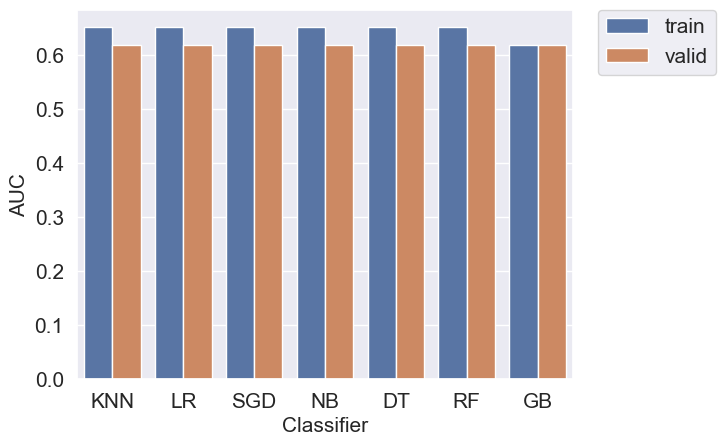

In [153]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [154]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

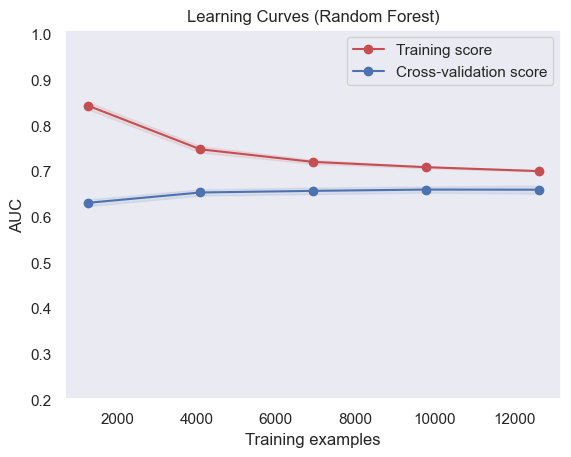

In [155]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, Y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In case of random forest, training and validation scores are similar but they both have low scores. This is sign of underfitting

Feature Importance

In [156]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [157]:
feature_importances.head()

,importance
number_inpatient,0.359443
rosiglitazone_No,0.262748
rosiglitazone_Steady,0.217943
discharge_disposition_id_22,0.203268
repaglinide_No,0.175037


For logistic regression, the variables with highest positive coefficients are predictive of re-hospitalization and the variables with highest negative coefficients are predictive of not being re-hospitalized. We can plot the top 50

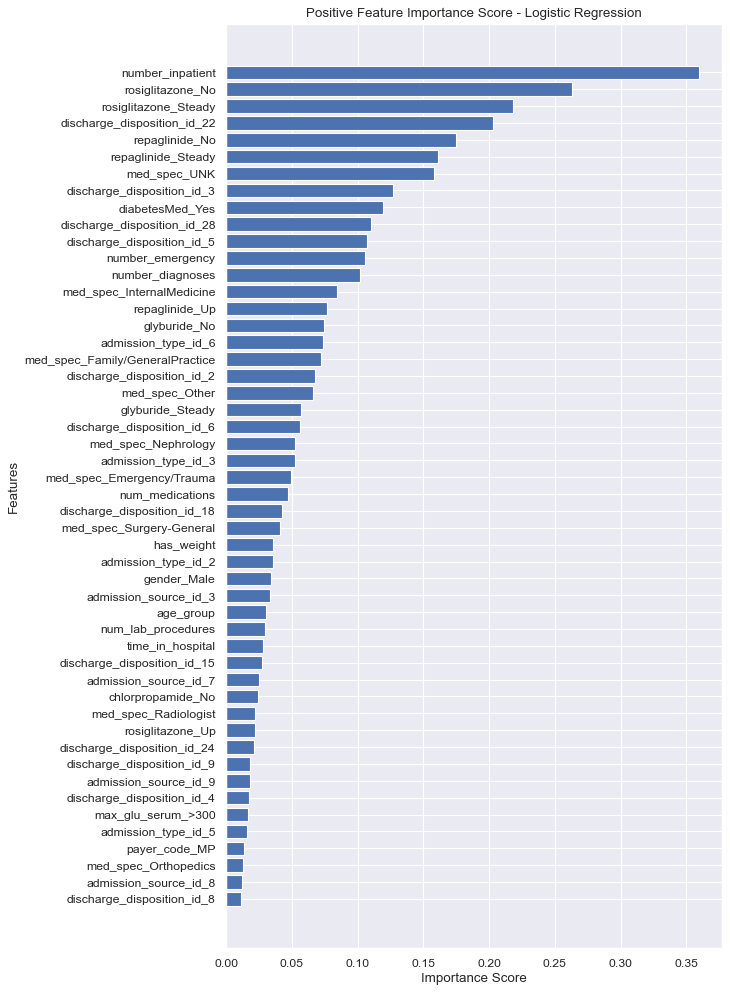

In [158]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

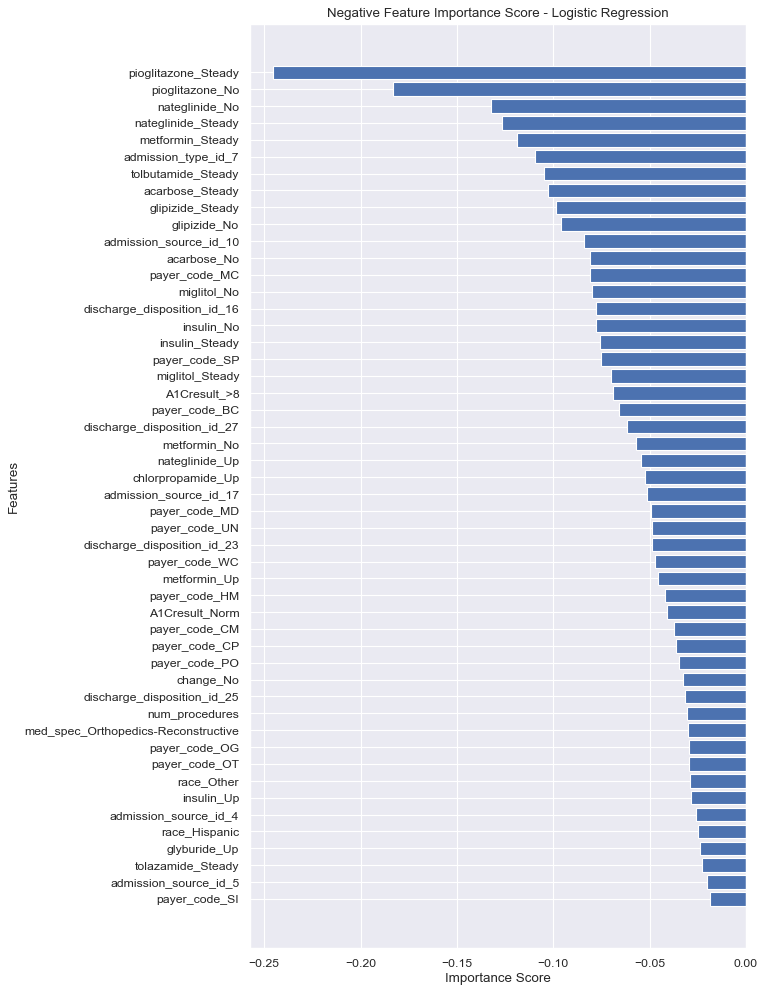

In [159]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

Model Selection: Hyperparameter tuning
stochastic gradient descent, random forest and gradient boosting classifier.

In [160]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [161]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['sqrt','log2']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['sqrt', 'log2'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc.

In [162]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [163]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [164]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, Y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


142.63498520851135


In [165]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

Let's analyze the performance of the best model compared to the baseline model.

In [166]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(Y_train, Y_train_preds)
rf_valid_auc_base = roc_auc_score(Y_valid, Y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(Y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(Y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.651
Validation AUC:0.619
Optimized Random Forest
Training AUC:0.731
Validation AUC:0.661


Optimize stochastic gradient descent

In [167]:
penalty = ['l2','l1','elasticnet']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, Y_train)
t2 = time.time()
print(t2-t1)

c:\Users\Nitin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


14.51376748085022


In [168]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 300, 'alpha': 0.1}

In [169]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(Y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(Y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(Y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(Y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.675
Validation AUC:0.662
Optimized sgdc
Training AUC:0.675
Validation AUC:0.662


Optimize gradient boosting classifier

In [170]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, Y_train)
t2 = time.time()
print(t2-t1)

208.63290882110596


In [171]:
gbc_random.best_params_

{'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.1}

In [172]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(Y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(Y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(Y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(Y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.696
Validation AUC:0.667
Optimized gbc
Training AUC:0.702
Validation AUC:0.672


Hyperparameter tuning results

In [173]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [174]:
df_results

,classifier,data_set,auc
0,SGD,base,0.661890
1,SGD,optimized,0.661890
2,RF,base,0.618807
3,RF,optimized,0.660940
4,GB,base,0.667300
5,GB,optimized,0.671792


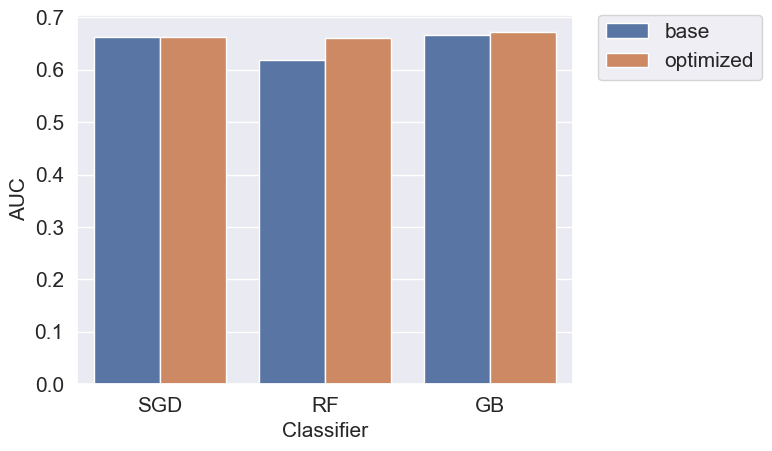

In [175]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

Here we will chose the gradient boosting classifier since it has the best AUC on the validation set.

In [176]:
#don't want to train your best classifier every time you want to run new predictions. 
# Therefore, we need to save the classifier. We will use the package pickle.
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

Model Evaluation
Now that we have selected our best model. Let's evaluate the performance of the test set.

In [177]:
X_test = df_test[cols2use].values
y_test = df_test['output_label'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [178]:
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [179]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [180]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(Y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(Y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.702
Accuracy:0.645
Recall:0.596
Precision:0.661
Specificity:0.694
Prevalence:0.500
 
Validation:
AUC:0.672
Accuracy:0.655
Recall:0.590
Precision:0.183
Specificity:0.664
Prevalence:0.113
 
Test:
AUC:0.666
Accuracy:0.648
Recall:0.582
Precision:0.184
Specificity:0.657
Prevalence:0.117
 


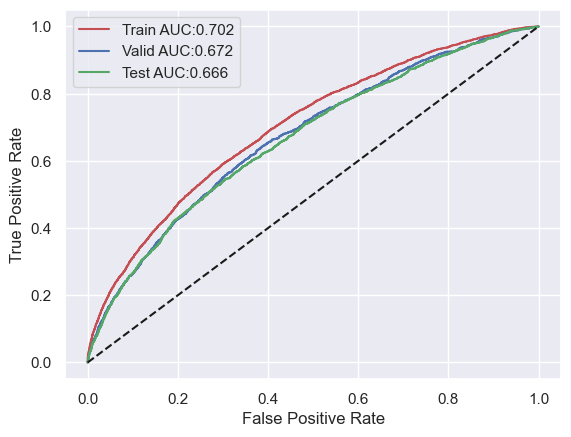

In [181]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_train_preds)
auc_train = roc_auc_score(Y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(Y_valid, y_valid_preds)
auc_valid = roc_auc_score(Y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Conclusion
Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On held out test data, our best model had an AUC of of 0.67. Using this model, we are able to catch 58% of the readmissions from our model that performs approximately 1.5 times better than randomly selecting patients.